In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

graph_colors = plt.cm.get_cmap("tab10").colors

In [2]:
def ratio_day(serie):
    l = [None]
    for i in range(1, len(serie)):
        l.append(round((serie[i] / serie[i - 1]), 3))

    return l

In [3]:
def substract(serie):
    l = [None]
    for i in range(1, len(serie)):
        l.append(round((serie[i] - serie[i - 1]), 3))

    return l

In [4]:
markers = ["o", "*", "v", "s", "p", "h"]
styles = ["-", "-.", "--", ":", "-", "-."]

In [5]:
path_data = os.path.join("csse_covid_19_data", "csse_covid_19_time_series")
file_data = "time_series_covid19_confirmed_global.csv"

In [6]:
data = (
    pd.read_csv(
        os.path.join(path_data, file_data),
        index_col=["Country/Region", "Province/State", "Lat", "Long"],
    )
    .sort_index()
    .T
)
data.index = pd.to_datetime(data.index)
data = data.round(3)
data.head()

Country/Region Afghanistan   Albania   Algeria   Andorra    Angola  \
Province/State         NaN       NaN       NaN       NaN       NaN   
Lat                33.0000   41.1533   28.0339   42.5063  -11.2027   
Long              65.0000   20.1683   1.6596    1.5218    17.8739    
2020-01-22               0         0         0         0         0   
2020-01-23               0         0         0         0         0   
2020-01-24               0         0         0         0         0   
2020-01-25               0         0         0         0         0   
2020-01-26               0         0         0         0         0   

Country/Region Antigua and Barbuda Argentina   Armenia  \
Province/State                 NaN       NaN       NaN   
Lat                        17.0608  -38.4161   40.0691   
Long                     -61.7964  -63.6167   45.0382    
2020-01-22                       0         0         0   
2020-01-23                       0         0         0   
2020-01-24                       0         0         0   
2020-01-25                       0         0         0   
2020-01-26                       0         0         0   

Country/Region                    Australia                  ...  \
Province/State Australian Capital Territory New South Wales  ...   
Lat                                -35.4735        -33.8688  ...   
Long                               149.0124        151.2093  ...   
2020-01-22                                0               0  ...   
2020-01-23                                0               0  ...   
2020-01-24                                0               0  ...   
2020-01-25                                0               0  ...   
2020-01-26                                0               3  ...   

Country/Region           United Kingdom             Uruguay Uzbekistan  \
Province/State Turks and Caicos Islands       NaN       NaN        NaN   
Lat                             21.6940   55.3781  -32.5228    41.3775   
Long                          -71.7979  -3.4360   -55.7658    64.5853    
2020-01-22                            0         0         0          0   
2020-01-23                            0         0         0          0   
2020-01-24                            0         0         0          0   
2020-01-25                            0         0         0          0   
2020-01-26                            0         0         0          0   

Country/Region Venezuela   Vietnam West Bank and Gaza Western Sahara  \
Province/State       NaN       NaN                NaN            NaN   
Lat              6.4238    16.0000            31.9522        24.2155   
Long           -66.5897   108.0000           35.2332       -12.8858    
2020-01-22             0         0                  0              0   
2020-01-23             0         2                  0              0   
2020-01-24             0         2                  0              0   
2020-01-25             0         2                  0              0   
2020-01-26             0         2                  0              0   

Country/Region    Zambia  Zimbabwe  
Province/State       NaN       NaN  
Lat             -15.4167  -20.0000  
Long            28.2833   30.0000   
2020-01-22             0         0  
2020-01-23             0         0  
2020-01-24             0         0  
2020-01-25             0         0  
2020-01-26             0         0  

[5 rows x 263 columns]

## Total

In [7]:
confirmed = pd.DataFrame(index=data.index)

In [8]:
confirmed["Total"] = data.sum(axis=1)

In [9]:
confirmed["ratio_tot"] = ratio_day(confirmed["Total"])

In [10]:
confirmed["ratio_diff_tot"] = substract(confirmed["ratio_tot"])

## W/o China

In [11]:
confirmed["Total_wo_China"] = confirmed["Total"] - data.loc[:, "China"].sum(axis=1)

In [12]:
confirmed["ratio_wo_China"] = ratio_day(confirmed["Total_wo_China"])

In [13]:
confirmed["ratio_diff_wo_China"] = substract(confirmed["ratio_wo_China"])

## Canada

In [14]:
confirmed["Total_Can"] = data.loc[:, "Canada"].sum(axis=1)

In [15]:
confirmed["ratio_Can"] = ratio_day(confirmed["Total_Can"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [16]:
confirmed["ratio_diff_Can"] = substract(confirmed["ratio_Can"])

## Quebec

In [17]:
confirmed["Total_Qc"] = data.loc[:, ("Canada", "Quebec")].sum(axis=1)

/Users/leroylouis/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1418: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [18]:
confirmed["ratio_Qc"] = ratio_day(confirmed["Total_Qc"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [19]:
confirmed["ratio_diff_Qc"] = substract(confirmed["ratio_Qc"])

## France (métropole)

In [20]:
confirmed["Total_Fra"] = data.loc[:, "France"].iloc[:, -1]
# data.loc[:, ("France", "France")].sum(axis=1)

In [21]:
confirmed["ratio_Fra"] = ratio_day(confirmed["Total_Fra"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [22]:
confirmed["ratio_diff_Fra"] = substract(confirmed["ratio_Fra"])

## USA

In [23]:
confirmed["Total_US"] = data.loc[:, "US"].sum(axis=1)

In [24]:
confirmed["ratio_US"] = ratio_day(confirmed["Total_US"])

In [25]:
confirmed["ratio_diff_US"] = substract(confirmed["ratio_US"])

## Tables

In [26]:
confirmed[["Total", "Total_wo_China", "Total_Can", "Total_Qc", "Total_Fra", "Total_US"]].tail()

,Total,Total_wo_China,Total_Can,Total_Qc,Total_Fra,Total_US
2020-04-03,1095917,1013406,12437,6101,64338,275586
2020-04-04,1197405,1114862,12978,6101,89953,308850
2020-04-05,1272115,1189513,15756,7944,92839,337072
2020-04-06,1345101,1262436,16563,8580,98010,366667
2020-04-07,1426096,1343378,17872,9340,109069,396223


In [27]:
confirmed[["ratio_tot", "ratio_wo_China", "ratio_Can", "ratio_Qc", "ratio_Fra", "ratio_US"]].tail()

,ratio_tot,ratio_wo_China,ratio_Can,ratio_Qc,ratio_Fra,ratio_US
2020-04-03,1.082,1.089,1.102,1.106,1.089,1.131
2020-04-04,1.093,1.100,1.043,1.000,1.398,1.121
2020-04-05,1.062,1.067,1.214,1.302,1.032,1.091
2020-04-06,1.057,1.061,1.051,1.080,1.056,1.088
2020-04-07,1.060,1.064,1.079,1.089,1.113,1.081


In [28]:
confirmed[
    [
        "ratio_diff_tot",
        "ratio_diff_wo_China",
        "ratio_diff_Can",
        "ratio_diff_Qc",
        "ratio_diff_Fra",
        "ratio_diff_US",
    ]
].tail()

,ratio_diff_tot,ratio_diff_wo_China,ratio_diff_Can,ratio_diff_Qc,ratio_diff_Fra,ratio_diff_US
2020-04-03,-0.005,-0.006,-0.078,-0.091,0.052,-0.011
2020-04-04,0.011,0.011,-0.059,-0.106,0.309,-0.010
2020-04-05,-0.031,-0.033,0.171,0.302,-0.366,-0.030
2020-04-06,-0.005,-0.006,-0.163,-0.222,0.024,-0.003
2020-04-07,0.003,0.003,0.028,0.009,0.057,-0.007


## Plots

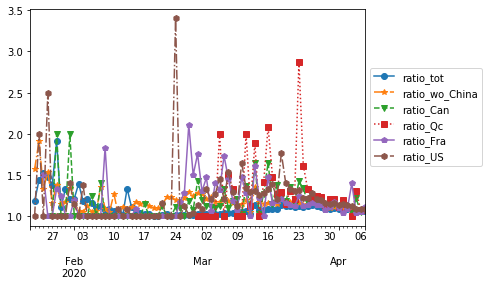

In [29]:
# Ratio
ax_ratio = confirmed[
    ["ratio_tot", "ratio_wo_China", "ratio_Can", "ratio_Qc", "ratio_Fra", "ratio_US"]
].plot()
for i, line in enumerate(ax_ratio.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(styles[i])
ax_ratio.legend(bbox_to_anchor=(1, 0.75))

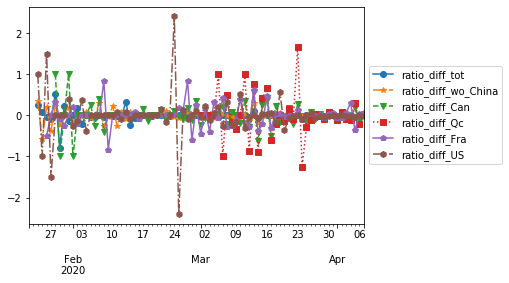

In [30]:
# Ratio diff
ax_ratio = confirmed[
    [
        "ratio_diff_tot",
        "ratio_diff_wo_China",
        "ratio_diff_Can",
        "ratio_diff_Qc",
        "ratio_diff_Fra",
        "ratio_diff_US",
    ]
].plot()
for i, line in enumerate(ax_ratio.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(styles[i])
ax_ratio.legend(bbox_to_anchor=(1, 0.75))

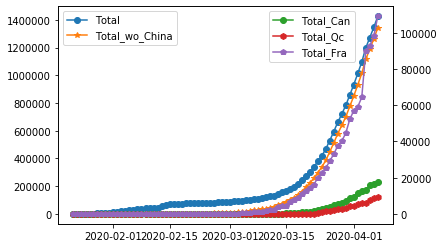

In [31]:
# Cases
fig, ax_total = plt.subplots(1,1)

ax_total.plot(confirmed[
    ["Total", "Total_wo_China"]
])
ax2 = ax_total.twinx()
ax2.plot(confirmed[
    ["Total_Can", "Total_Qc", "Total_Fra"]
])
for i, line in enumerate(ax_total.get_lines()):
    line.set_marker(markers[i])
for j, line in enumerate(ax2.get_lines()):
    line.set_marker(markers[-j])
    line.set_color(graph_colors[j+2])
    
ax_total.legend(["Total", "Total_wo_China", "Total_Can", "Total_Qc", "Total_Fra"])
ax2.legend(["Total_Can", "Total_Qc", "Total_Fra"], bbox_to_anchor=(0.9, 1))